# Data Mining & Machine Learning Assignment

**Objective:**
The primary aim of this assignment is to evaluate your ability to conduct a data science project from start to finish using the UCI dataset (Subject Area: Health and Medicine) https://archive.ics.uci.edu/. You are expected to demonstrate proficiency in data management, basic machine learning model construction, experimentation, and evaluation.
Please ensure that you submit the complete assignment before midnight on November 25, 2023, and prepare your presentation using PowerPoint. The presentation should be concise, with no more than 5 slides. The presentation is scheduled for November 27, 2023.

**Dataset:**
Please select a dataset from the UCI dataset repository in the subject area of health and medicine that contains at least 10 features.

# Wisconsin Breast Cancer dataset

In [1]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# 1. Data Preparation and Exploration


### a) Conduct exploratory data analysis to understand the distribution and relationships among variables.

In [2]:
df = pd.read_csv("data.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Get a statistical summary of the numerical columns
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [5]:
print("Wisconsis Breast Cancer dataset has {} rows with {} features.".format(*df.shape))

Wisconsis Breast Cancer dataset has 569 rows with 33 features.


### b) Handle any missing or erroneous data appropriately.

In [6]:
# Get the number of missing values in each column
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [8]:
df = df.drop('Unnamed: 32', axis=1)
df = df.drop('id', axis=1)

In [9]:
print(df.columns.tolist())

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [10]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [11]:
# find nulls

nulls = df.isnull().sum()
nulls = nulls.sum()
# no nulls, 31 cols, great
print('\nThere are', df.shape[0],'rows in the dataset')
print('There are', df.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')


There are 569 rows in the dataset
There are 31 columns (features) in the dataset
There are 0 nulls in the dataset


### Visualization

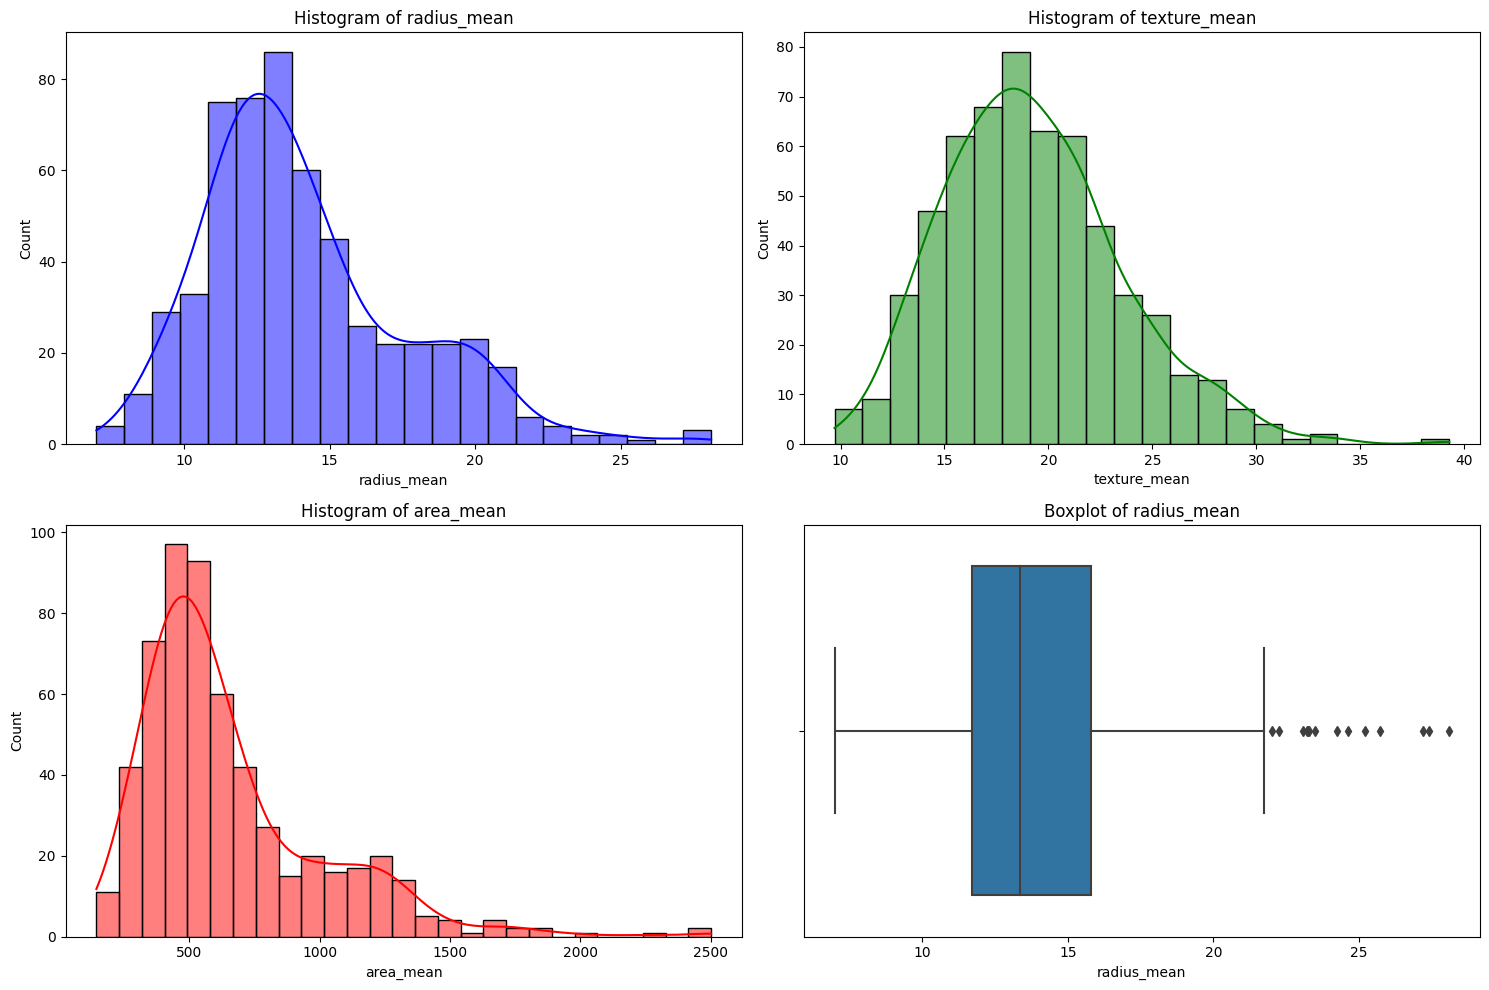

In [12]:
# Setting up the visualizations
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Histograms for 'radius_mean', 'texture_mean', and 'area_mean'
sns.histplot(df['radius_mean'], kde=True, color="blue", ax=axs[0, 0])
axs[0, 0].set_title('Histogram of radius_mean')

sns.histplot(df['texture_mean'], kde=True, color="green", ax=axs[0, 1])
axs[0, 1].set_title('Histogram of texture_mean')

sns.histplot(df['area_mean'], kde=True, color="red", ax=axs[1, 0])
axs[1, 0].set_title('Histogram of area_mean')

# Boxplot for 'radius_mean'
sns.boxplot(x=df['radius_mean'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of radius_mean')

plt.tight_layout()
plt.show()

**Histograms** (*radius_mean, texture_mean, area_mean*):

These histograms display the distribution of values for three key features: radius_mean, texture_mean, and area_mean.
Each histogram shows the frequency of data points within a range of values, helping to understand the spread and central tendencies of these measurements.
The shape of the histogram (skewed) indicate the distribution type and highlight potential outliers or anomalies in the data.

**Boxplot** (*radius_mean*):

The boxplot for *radius_mean* provides a summary of its distribution, showcasing the median, quartiles, and potential outliers.
The central box represents the interquartile range (IQR), the line within the box shows the median, and the 'whiskers' extend to show the range of the data, excluding outliers.
Points outside the whiskers are potential outliers, indicating unusually high or low measurements compared to the rest of the data.

In [13]:
# Selecting a subset of columns for scatter plot and correlation heatmap
subset_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

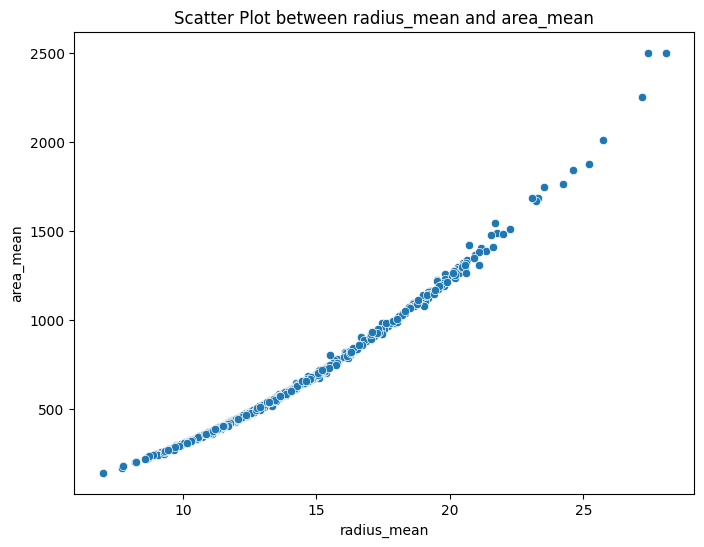

In [14]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_mean', y='area_mean', data=df)
plt.title('Scatter Plot between radius_mean and area_mean')
plt.show()

**Scatter Plot** (*radius_mean vs. area_mean*):

This scatter plot visualizes the relationship between radius_mean and area_mean.
Each point on the plot corresponds to a single observation, with its position determined by the values of radius_mean (x-axis) and area_mean (y-axis).
Patterns in the scatter plot can reveal correlations or trends between these two features, such as a linear relationship, clusters, or lack of any discernible pattern.

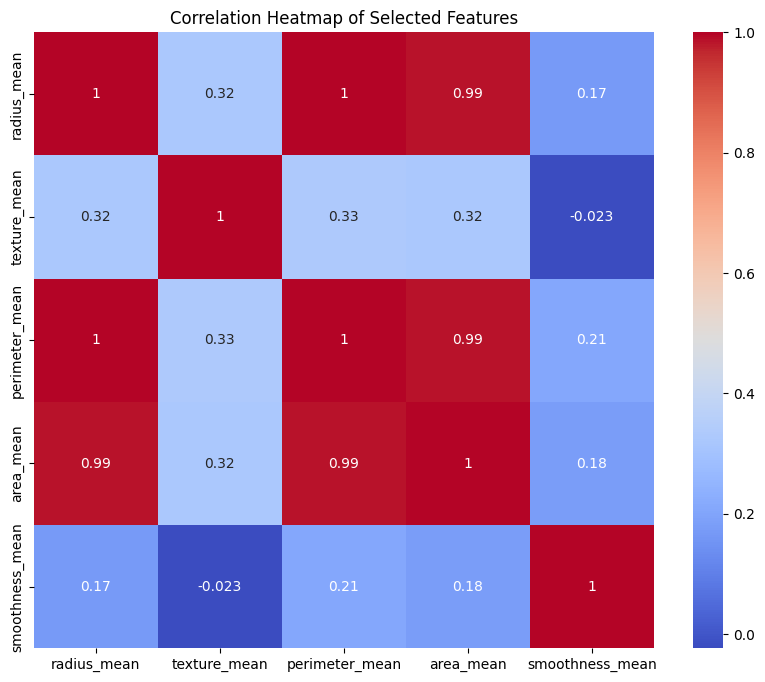

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[subset_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

**Correlation Heatmap** (*subset of features*):

The correlation heatmap displays the correlation coefficients between pairs of features in the selected subset.
Each cell in the heatmap shows the correlation between two features, with the color intensity and the annotation indicating the strength and direction of the relationship (ranging from -1 to 1).
This visualization is useful for identifying features that are strongly correlated, either positively or negatively, which can be crucial for feature selection and understanding the underlying structure of the data.

# 2. Feature Engineering and Selection

## a. Create new features if necessary and select the most relevant features for predicting your outcome (disease).

In [16]:
# rename some columns
df = df.rename(columns={'concave points_mean':'concave_points_mean',
                                'concave points_worst':'concave_points_worst', 'concave points_se':'concave_points_se'})

In [17]:
# Percentage of cancer and no breast cancer participants

count_no_cancer = len(df[df['diagnosis']=='B'])
count_cancer = len(df[df['diagnosis']=='M'])

pct_no_cancer = count_no_cancer/(count_no_cancer+count_cancer)*100
pct_of_cancer = count_cancer/(count_no_cancer+count_cancer)*100

print("No Breast Cancer: {:.1f}".format(pct_no_cancer), '%')
print("Breast Cancer: {:.1f}".format(pct_of_cancer), '%')

No Breast Cancer: 62.7 %
Breast Cancer: 37.3 %


In [18]:
# Convert 'M' to 1 and 'B' to 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df['diagnosis'].unique()

array([1, 0])

In [19]:
#Loading the dataset
array = df.values
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [20]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.9 MB/s eta 0:00:00


In [21]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

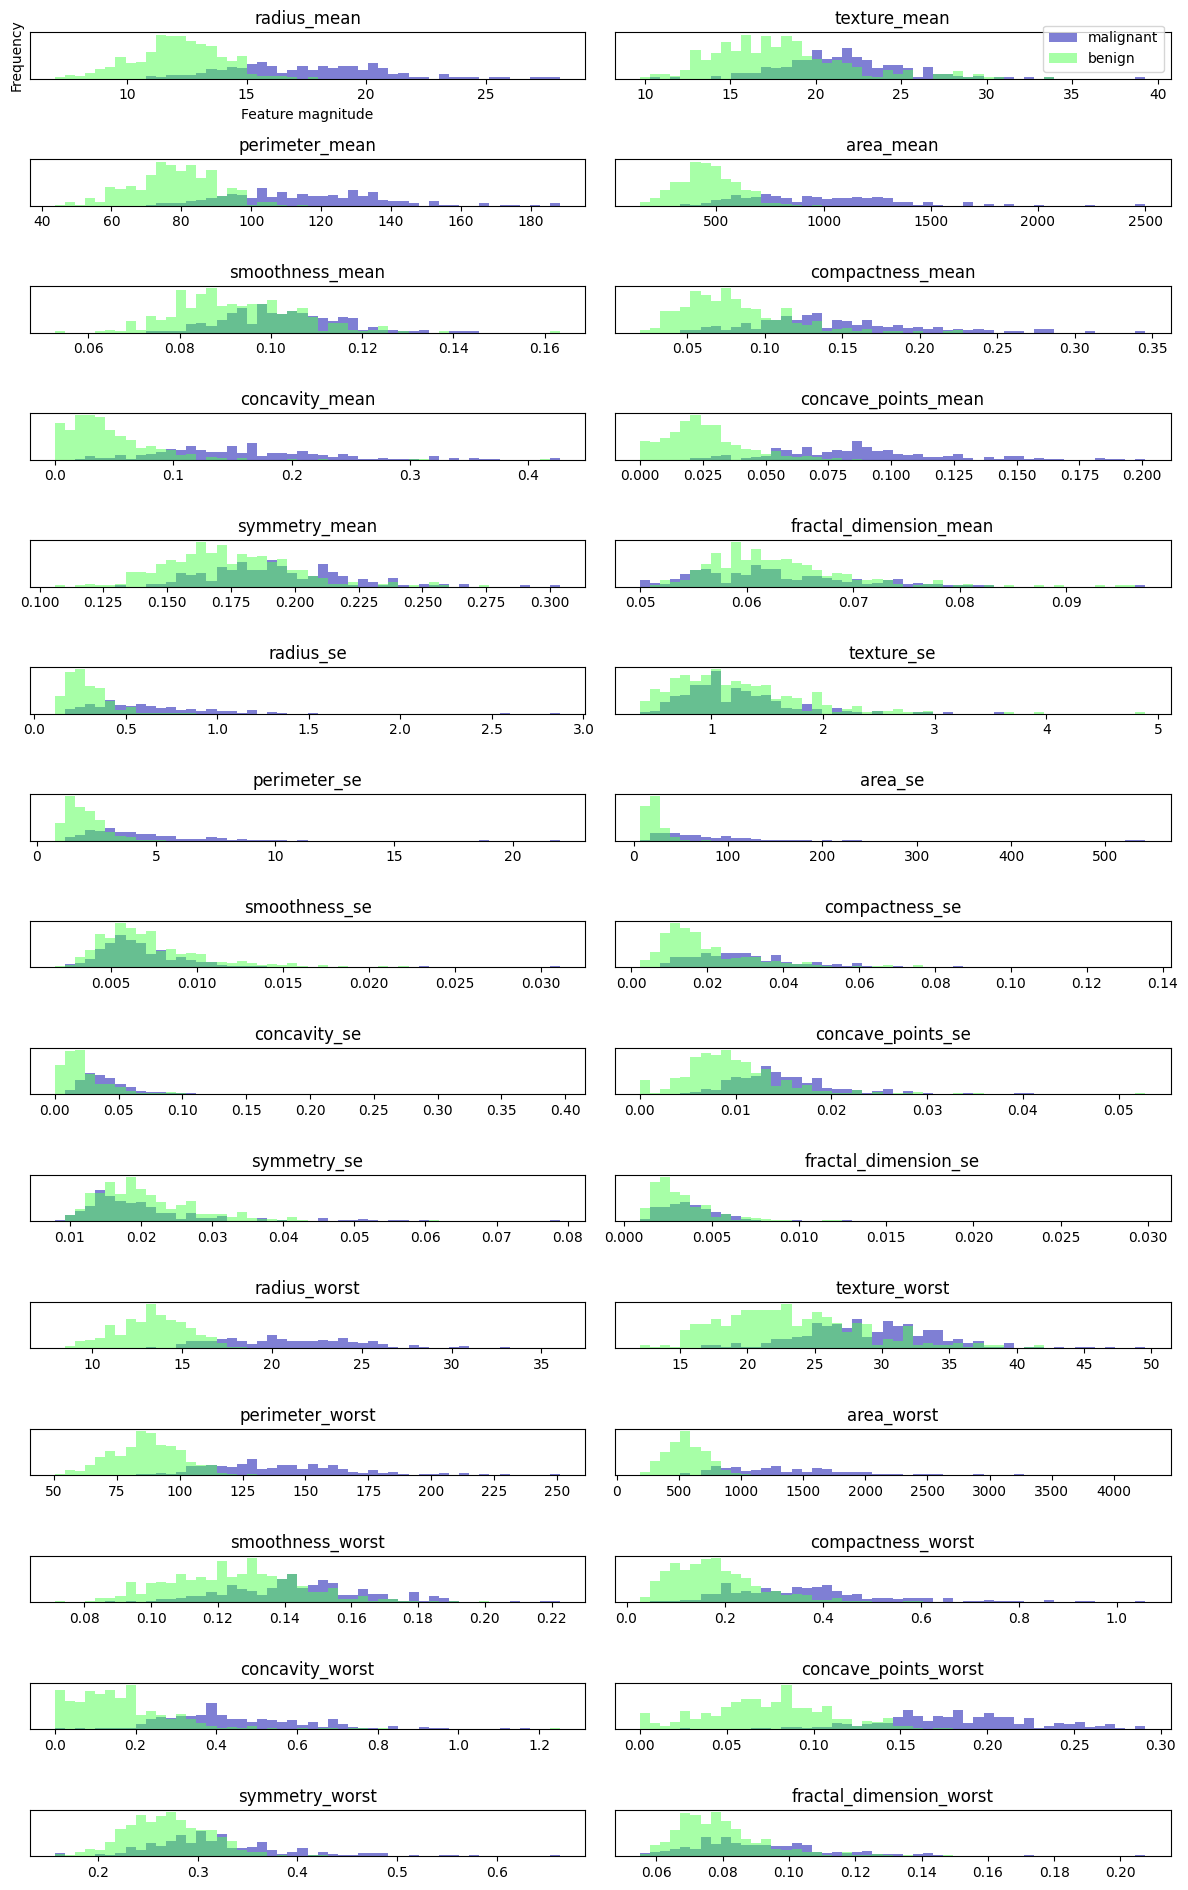

In [22]:
#  Per-class feature histograms on the Breast Cancer dataset
import mglearn

# Separate the dataset into malignant and benign based on 'diagnosis'
malignant = df[df['diagnosis'] == 1]
benign = df[df['diagnosis'] == 0]

# Setup the figure for plotting
fig, axes = plt.subplots(15, 2, figsize=(12, 19))
ax = axes.ravel()

for i in range(1, 31):  # Looping through the feature columns
    _, bins = np.histogram(df.iloc[:, i], bins=50)
    ax[i-1].hist(malignant.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i-1].hist(benign.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i-1].set_title(df.columns[i])
    ax[i-1].set_yticks(())
    if i == 1:
        ax[i-1].set_xlabel("Feature magnitude")
        ax[i-1].set_ylabel("Frequency")
    if i == 2:
        ax[i-1].legend(["malignant", "benign"], loc="best")

fig.tight_layout()
plt.show()

# from here we can see that there is a lot of overlap of the 2 distributions between, say, texture error.
# so we're not going to get much new information there. However, looking at say, worst concave points,
# there's a lot of variation in the 2 populations, so we'll get a lot of information from that featuer.

**mglearn** is a Python library created to supplement the book **"Introduction to Machine Learning with Python"** by *Andreas Müller* and *Sarah Guido*.
It simplifies code examples and enhances visualizations, making it easier to understand complex machine learning concepts and data patterns.
In the context of the per-class feature histograms, mglearn is used for color mapping, aiding in distinguishing between different classes (such as malignant and benign in the Breast Cancer dataset) visually.

In [23]:
# 31 is quite a lot of features, I will cut this down to 20 or so.
# using Wrapper method for feature selection, then I will cross-reference with Feature Importance and Lasso.

#Adding constant column of ones, mandatory for sm.OLS model

X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                      0.000003
radius_mean                0.209985
texture_mean               0.567426
perimeter_mean             0.344641
area_mean                  0.545391
smoothness_mean            0.966529
compactness_mean           0.001635
concavity_mean             0.181887
concave_points_mean        0.279657
symmetry_mean              0.890067
fractal_dimension_mean     0.995240
radius_se                  0.161800
texture_se                 0.854525
perimeter_se               0.584129
area_se                    0.509235
smoothness_se              0.017046
compactness_se             0.976145
concavity_se               0.006327
concave_points_se          0.053103
symmetry_se                0.534019
fractal_dimension_se       0.540769
radius_worst               0.000814
texture_worst              0.303339
perimeter_worst            0.681807
area_worst                 0.001648
smoothness_worst           0.705288
compactness_worst          0.860902
concavity_worst            0

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X, y)

pd.set_option('display.max_rows', 30) #expand the cols to see all cols
pd.DataFrame({'Columns':X.columns, 'Importance':dt.feature_importances_}).sort_values(by='Importance', ascending=False)

# for DecisionTreeClassifier, these are my most important features.

Columns  Importance
20             radius_worst    0.695594
27     concave_points_worst    0.144770
21            texture_worst    0.063798
1              texture_mean    0.031208
24         smoothness_worst    0.025682
18              symmetry_se    0.014208
23               area_worst    0.011086
6            concavity_mean    0.008771
13                  area_se    0.002045
26          concavity_worst    0.001836
14            smoothness_se    0.001004
17        concave_points_se    0.000000
22          perimeter_worst    0.000000
25        compactness_worst    0.000000
19     fractal_dimension_se    0.000000
28           symmetry_worst    0.000000
0               radius_mean    0.000000
15           compactness_se    0.000000
16             concavity_se    0.000000
12             perimeter_se    0.000000
11               texture_se    0.000000
10                radius_se    0.000000
9    fractal_dimension_mean    0.000000
8             symmetry_mean    0.000000
7       concave_points_mean    0.000000
5          compactness_mean    0.000000
4           smoothness_mean    0.000000
3                 area_mean    0.000000
2            perimeter_mean    0.000000
29  fractal_dimension_worst    0.000000

In [25]:
#Backward Elimination for feature selection (befs)
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max) # if p-vals are < .05, they are not significant predictors of my DV, so remove them.
    else:
        break
selected_features_BE = cols
print(selected_features_BE) # final set of cols to use

['radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se', 'concavity_se', 'concave_points_se', 'radius_worst', 'texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [26]:
# Feature Selection to choose the most important variables in my dataset. 30+ features
# is quite a lot and there's likely some multicolinnearity happening. I will choose the top
# 20 features, based on the results of these methods.

# embedded method

X_fs = df.drop('diagnosis', axis=1)
y_fs = df['diagnosis']

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.201830
Best score using built-in LassoCV: 0.661795


In [27]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 26 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

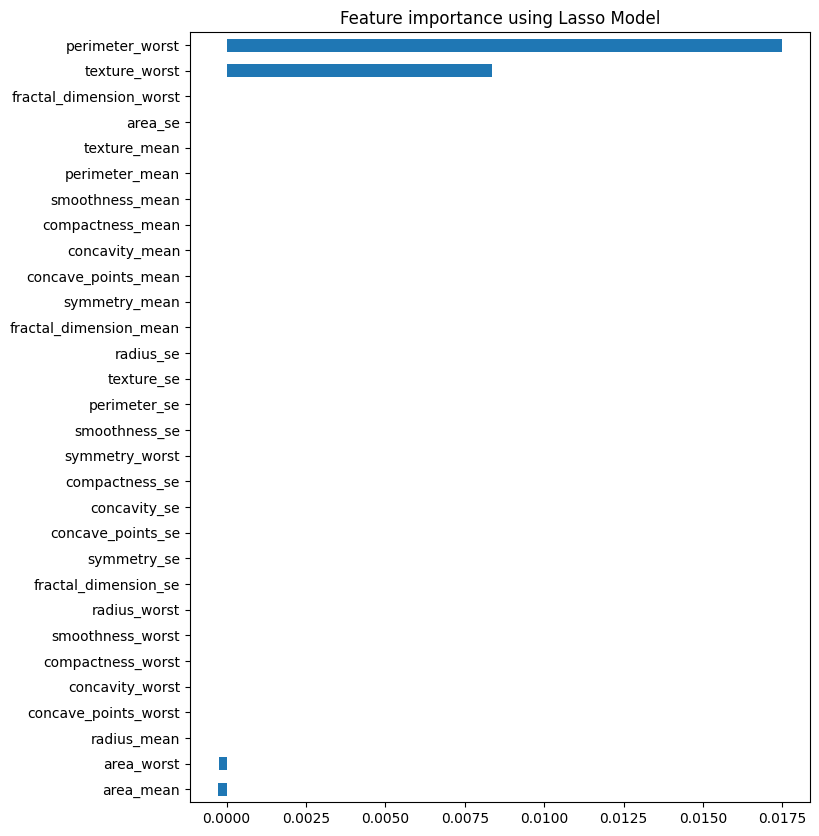

In [28]:
# From the entire dataset,
      #Lasso chose perimeter_worst, texture_worst, area_worst, and area_mean.
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")



In [29]:
# dataset backwards elimination feature selection, lasso, feature importance

dataset_befs=df[['diagnosis','radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se',
            'concavity_se', 'concave_points_se', 'radius_worst', 'area_se', 'compactness_se', 'area_mean',
              'concave_points_worst','texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst',
              'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst']]

In [30]:
# can see the means of individual features, grouped by diagnosis
dataset_befs.groupby('diagnosis').mean()

radius_mean  compactness_mean  concave_points_mean  radius_se  \
diagnosis                                                                  
0            12.146524          0.080085             0.025717   0.284082   
1            17.462830          0.145188             0.087990   0.609083   

           smoothness_se  concavity_se  concave_points_se  radius_worst  \
diagnosis                                                                 
0               0.007196      0.025997           0.009858     13.379801   
1               0.006780      0.041824           0.015060     21.134811   

             area_se  compactness_se   area_mean  concave_points_worst  \
diagnosis                                                                
0          21.135148        0.021438  462.790196              0.074444   
1          72.672406        0.032281  978.376415              0.182237   

           texture_worst   area_worst  concavity_worst  symmetry_worst  \
diagnosis                                                                
0              23.515070   558.899440         0.166238        0.270246   
1              29.318208  1422.286321         0.450606        0.323468   

           fractal_dimension_worst  smoothness_worst  perimeter_worst  
diagnosis                                                              
0                         0.079442          0.124959        87.005938  
1                         0.091530          0.144845       141.370330

In [31]:
# visualizing all my features at once

#sns.set()
#sns.pairplot(data=dataset_befs, hue = 'diagnosis', palette ='magma')

#### Correlation Analysis:

Checking for multicollinearity through correlation analysis. This helps in identifying and addressing issues that can affect model performance.
Removing highly correlated features can reduce redundancy. However, ensure that the feature removed is not more predictive than the one retained.

In [32]:
#Predictive Analysis
#Predictive model - first need to check for correlation in the dataset

dataset_fs = dataset_befs

df_fs_corr = dataset_fs.corr() #finds linear pearson correlation
df_fs_corr = df_fs_corr[df_fs_corr < 1] #to avoid correlating values with themselves (ie corr = 1)
df_fs_corr

diagnosis  radius_mean  compactness_mean  \
diagnosis                      NaN     0.730029          0.596534   
radius_mean               0.730029          NaN          0.506124   
compactness_mean          0.596534     0.506124               NaN   
concave_points_mean       0.776614     0.822529          0.831135   
radius_se                 0.567134     0.679090          0.497473   
smoothness_se            -0.067016    -0.222600          0.135299   
concavity_se              0.253730     0.194204          0.570517   
concave_points_se         0.408042     0.376169          0.642262   
radius_worst              0.776454     0.969539          0.535315   
area_se                   0.548236     0.735864          0.455653   
compactness_se            0.292999     0.206000          0.738722   
area_mean                 0.708984     0.987357          0.498502   
concave_points_worst      0.793566     0.744214          0.815573   
texture_worst             0.456903     0.297008          0.248133   
area_worst                0.733825     0.941082          0.509604   
concavity_worst           0.659610     0.526911          0.816275   
symmetry_worst            0.416294     0.163953          0.510223   
fractal_dimension_worst   0.323872     0.007066          0.687382   
smoothness_worst          0.421465     0.119616          0.565541   
perimeter_worst           0.782914     0.965137          0.590210   

                         concave_points_mean  radius_se  smoothness_se  \
diagnosis                           0.776614   0.567134      -0.067016   
radius_mean                         0.822529   0.679090      -0.222600   
compactness_mean                    0.831135   0.497473       0.135299   
concave_points_mean                      NaN   0.698050       0.027653   
radius_se                           0.698050        NaN       0.164514   
smoothness_se                       0.027653   0.164514            NaN   
concavity_se                        0.439167   0.332358       0.268685   
concave_points_se                   0.615634   0.513346       0.328429   
radius_worst                        0.830318   0.715065      -0.230691   
area_se                             0.690299   0.951830       0.075150   
compactness_se                      0.490424   0.356065       0.336696   
area_mean                           0.823269   0.732562      -0.166777   
concave_points_worst                0.910155   0.531062      -0.102007   
texture_worst                       0.292752   0.194799      -0.074743   
area_worst                          0.809630   0.751548      -0.182195   
concavity_worst                     0.752399   0.380585      -0.058298   
symmetry_worst                      0.375744   0.094543      -0.107342   
fractal_dimension_worst             0.368661   0.049559       0.101480   
smoothness_worst                    0.452753   0.141919       0.314457   
perimeter_worst                     0.855923   0.719684      -0.217304   

                         concavity_se  concave_points_se  radius_worst  \
diagnosis                    0.253730           0.408042      0.776454   
radius_mean                  0.194204           0.376169      0.969539   
compactness_mean             0.570517           0.642262      0.535315   
concave_points_mean          0.439167           0.615634      0.830318   
radius_se                    0.332358           0.513346      0.715065   
smoothness_se                0.268685           0.328429     -0.230691   
concavity_se                      NaN           0.771804      0.186904   
concave_points_se            0.771804                NaN      0.358127   
radius_worst                 0.186904           0.358127           NaN   
area_se                      0.270895           0.415730      0.757373   
compactness_se               0.801268           0.744083      0.204607   
area_mean                    0.207660           0.372320      0.962746   
concave_points_worst         0.440472           0.602450  

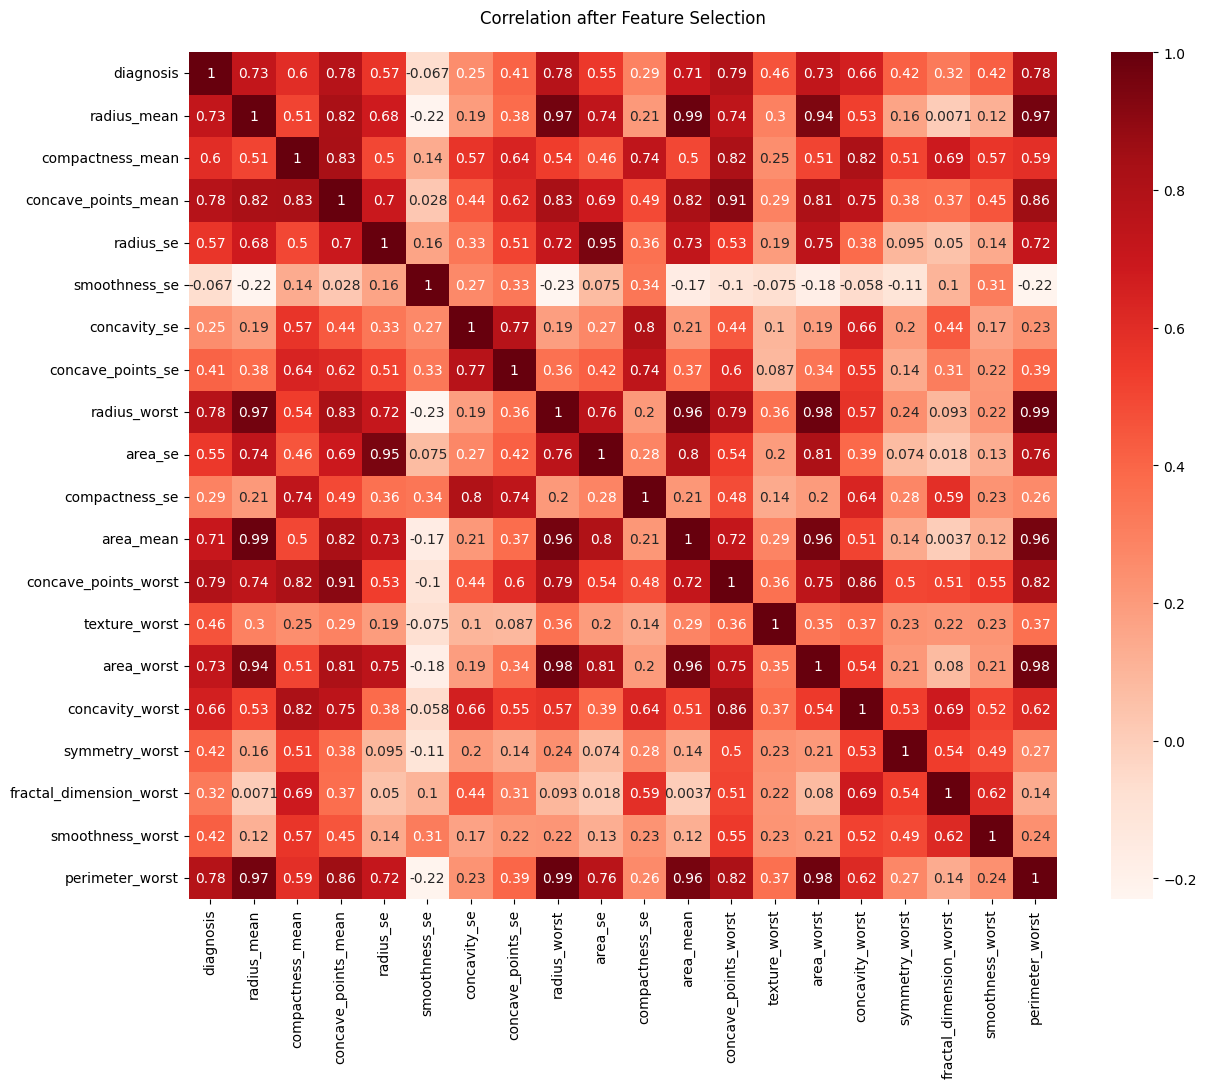

In [33]:
#Using Pearson Correlation
plt.figure(figsize=(14,11))
cor = dataset_befs.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation after Feature Selection\n", size=12)
plt.show()
# radius_mean is highly corr with radius_worst and area_worst, implies multicollinearity.
            #Radius_worst is the most highly corr with diagnosis, so I will keep that one
# compactness
# area mean highly corr w radius_mean, remove area_mean

#### Boxplots for Feature Visualization:

The boxplots for different features against the diagnosis are useful for visualizing the distribution of these features across different classes.
This can provide insights into which features are more discriminative in terms of the target variable.

Text(0.5, 0, 'Diagnosis')

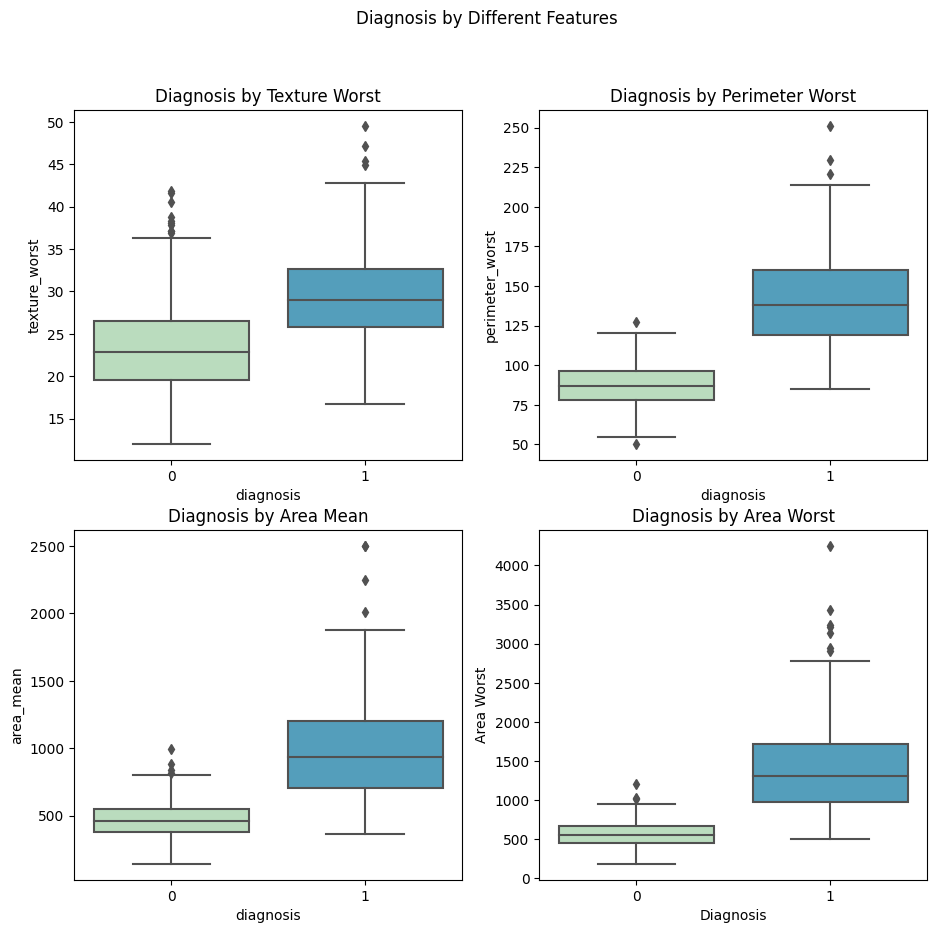

In [34]:
f, axes= plt.subplots(2, 2, figsize=(11,10), facecolor='white')
f.suptitle('Diagnosis by Different Features')

# radius_mean, concave_points_mean, texture_mean, symmetry_worst

ax1 = sns.boxplot(x='diagnosis',  y='perimeter_worst', palette='GnBu', data= dataset_befs, ax=axes[0,1])
ax1.title.set_text('Diagnosis by Perimeter Worst')
plt.ylabel("Perimeter Worst")
plt.xlabel("Diagnosis")

ax2 = sns.boxplot(x='diagnosis', y='texture_worst', palette='GnBu', data=dataset_befs, ax=axes[0,0])
ax2.title.set_text("Diagnosis by Texture Worst")
plt.ylabel("Texture Worst")
plt.xlabel("Diagnosis")

ax3= sns.boxplot(x='diagnosis', y='area_mean', palette='GnBu', data=dataset_befs, ax=axes[1,0])
ax3.title.set_text("Diagnosis by Area Mean")
plt.xlabel("Diagnosis")
plt.ylabel("Area Mean")


ax4=sns.boxplot(x='diagnosis', y='area_worst', palette='GnBu', data=dataset_befs, ax=axes[1,1])
ax4.title.set_text("Diagnosis by Area Worst")
plt.ylabel("Area Worst")
plt.xlabel("Diagnosis")

In [35]:
dataset_fs = dataset_befs
dataset_fs.shape

(569, 20)

## b. Normalize or standardize the data as required.

In [36]:
from sklearn.preprocessing import StandardScaler

# Standardize the features before train-test split
scaler = StandardScaler()
X_fs_scaled = scaler.fit_transform(X_fs)

# Splitting the scaled data
X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(
    X_fs_scaled, y_fs, test_size=0.2, random_state=1, stratify=y_fs)

print("Data scaling and splitting completed.")


Data scaling and splitting completed.


# 3. Model Construction


## a. Split the dataset into training and testing sets, maintaining a good balance of classes in both sets.

#### Training and Test Set Splitting:

Splitting the dataset into training and validation sets using stratification. This ensures that both sets are representative of the overall dataset.

In [37]:
#training and testing set size

train_size=int(0.80*dataset_fs.shape[0])
test_size=int(0.20*dataset_fs.shape[0])
print("80% training set size: "+ str(train_size))
print("20% validation set size: "+str(test_size))

# Shuffle dataset and get required features

Data=dataset_fs.sample(frac=1)
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']

80% training set size: 455
20% validation set size: 113


In [87]:
print(X_fs.columns.tolist())

['radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se', 'concavity_se', 'concave_points_se', 'radius_worst', 'area_se', 'compactness_se', 'area_mean', 'concave_points_worst', 'texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst']


In [38]:
##############################################################################################
# Split-out dataset
##############################################################################################
array = dataset_fs.values
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']
# dataset_fs['diagnosis'] = diagnosis

print('Class labels:', np.unique(y_fs)) #split the data into train and test
# using holdout

from sklearn.model_selection import train_test_split
X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(
    X_fs, y_fs, test_size=0.2, random_state = 1, stratify=y_fs)

#stratify ensures the train_test_split method returns trianing and test subsets that have the same
# proportion of class labels as the input dataset

# Eg, if 20% of patients have breast cancer and 80% don’t have breast cancer, setting ‘stratify’ to y
# will ensure that the random split has 20% of patients w breast cancer and 70% of patients w/o breast cancer.
print('Dataset successfully split using stratify.')

Class labels: [0 1]
Dataset successfully split using stratify.


## b. Build three basic machine learning models from this course to predict the presence of the disease.

### 1. kNN Model Creation and Initial Evaluation

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski', weights='distance', p=2)
knn_clf_fs = knn.fit(X_train_fs, y_train_fs)

# Evaluate initial model accuracy
knn_fs_score = knn.score(X_validation_fs, y_validation_fs) * 100
print('Initial kNN Accuracy with feature selection: {:.2f}%'.format(knn_fs_score))


Initial kNN Accuracy with feature selection: 95.61%


#### 2. Visualizing kNN Decision Boundary

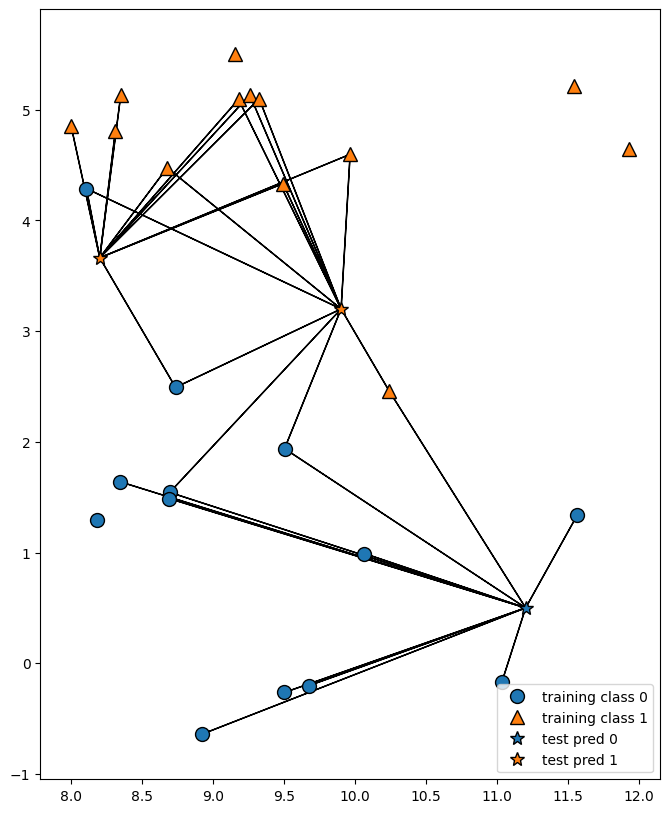

In [40]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=11)


#### 3. kNN Model Performance Metrics

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_fs = knn.predict(X_validation_fs)
print('Confusion Matrix:\n', confusion_matrix(y_validation_fs, y_pred_fs))
print('\nClassification Report:\n', classification_report(y_validation_fs, y_pred_fs))


Confusion Matrix:
 [[70  2]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### 4. Finding Optimal Number of Neighbors

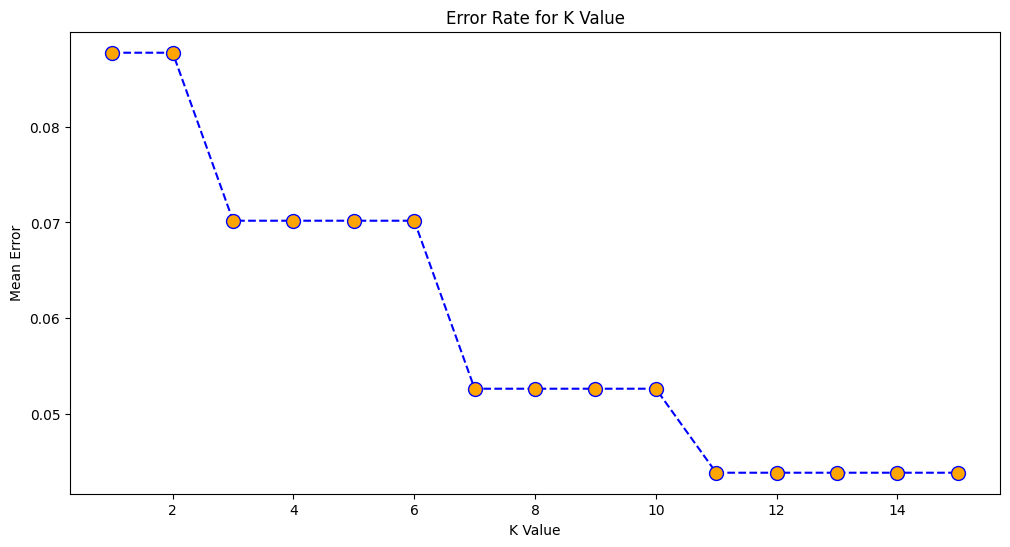

In [42]:
error = []
# Calculating error for K values between 1 and 16
for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_fs, y_train_fs)
    pred_i = knn.predict(X_validation_fs)
    error.append(np.mean(pred_i != y_validation_fs))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate for K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


#### 5. Analyzing ROC Curve and AUC
This section is for further tuning the 'n_neighbors' parameter using AUC as a metric.

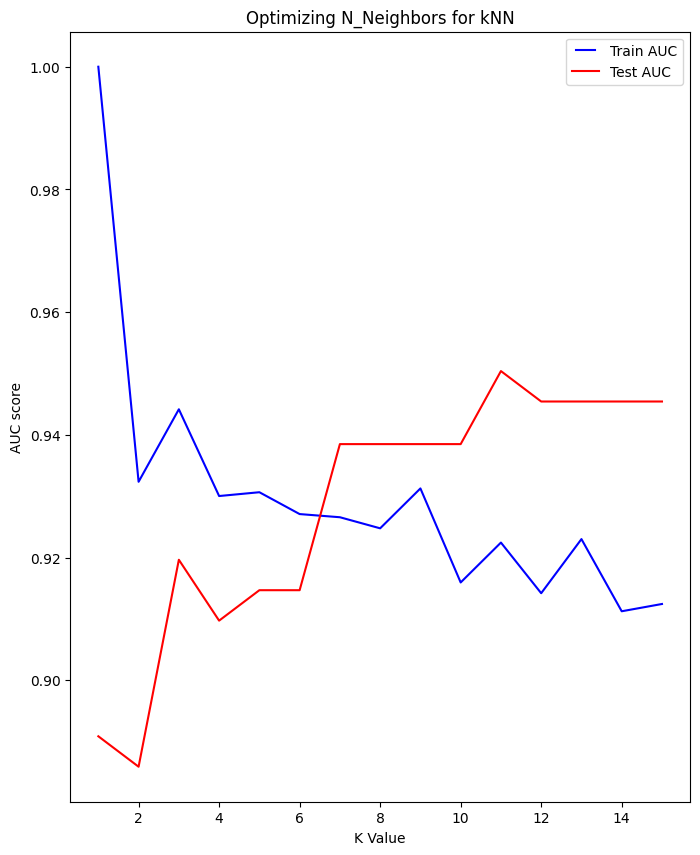

In [43]:
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D

neighbors = list(range(1, 16))
train_results = []
test_results = []
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train_fs, y_train_fs)
    train_pred = model.predict(X_train_fs)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_fs, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred_fs = model.predict(X_validation_fs)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation_fs, y_pred_fs)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('K Value')
plt.title('Optimizing N_Neighbors for kNN')
plt.show()


#### 6. Fine-Tuning the Minkowski Power Parameter
This section explores the optimal power parameter for the Minkowski distance.

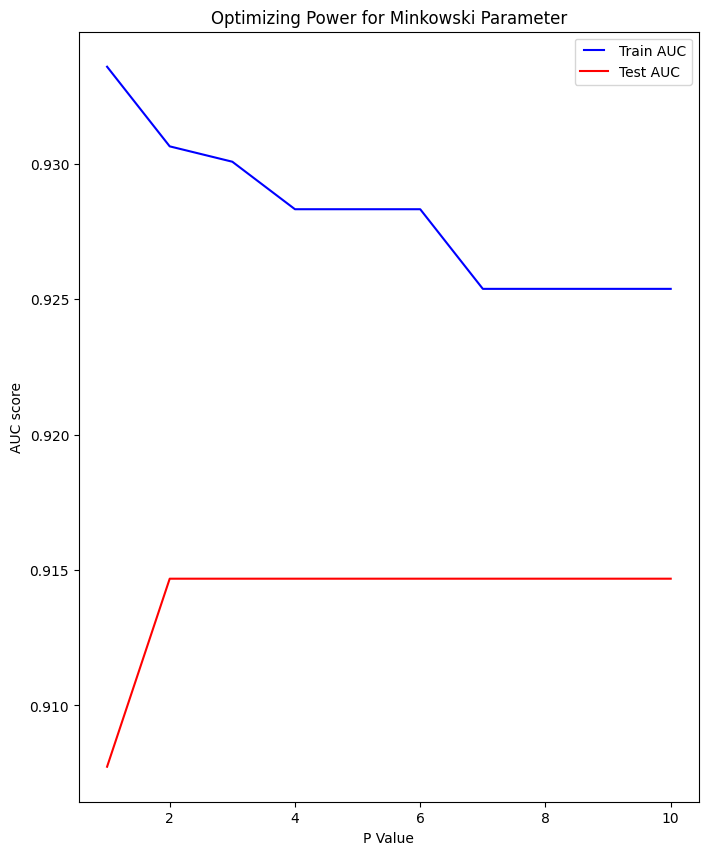

In [44]:
distances = list(range(1, 11))
train_results = []
test_results = []
for p in distances:
    model = KNeighborsClassifier(p=p)
    model.fit(X_train_fs, y_train_fs)
    train_pred = model.predict(X_train_fs)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_fs, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred_fs = model.predict(X_validation_fs)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation_fs, y_pred_fs)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(distances, train_results, 'b', label='Train AUC')
line2, = plt.plot(distances, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('P Value')
plt.title("Optimizing Power for Minkowski Parameter")
plt.show()


#### 7. Cross-Validation for kNN
This section performs cross-validation to assess the model's performance more reliably.

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Create a new KNN model with optimal hyperparameters
knn_cv_fs = KNeighborsClassifier(n_neighbors=11, p=2)

# Train model with 6-fold cross-validation
knn_fs_cv_scores = cross_val_score(knn_cv_fs, X, y, cv=6) * 100

# Print cross-validation scores and their mean
print('CV Scores (Accuracy): {}%'.format(knn_fs_cv_scores))
print('Mean CV Score: {:.2f}%'.format(np.mean(knn_fs_cv_scores)))


CV Scores (Accuracy): [88.42105263 91.57894737 95.78947368 94.73684211 93.68421053 95.74468085]%
Mean CV Score: 93.33%


#### 8. Evaluating Error Metrics for kNN
Assess the model's prediction errors using various metrics.

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit the classifier to the training data
knn_cv_fs.fit(X_train_fs, y_train_fs)

# Predict on the validation set
y_pred_fs = knn_cv_fs.predict(X_validation_fs)

# Calculate error metrics
print('Mean Absolute Error:', mean_absolute_error(y_validation_fs, y_pred_fs))
print('Mean Squared Error:', mean_squared_error(y_validation_fs, y_pred_fs))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_validation_fs, y_pred_fs)))


Mean Absolute Error: 0.043859649122807015
Mean Squared Error: 0.043859649122807015
Root Mean Squared Error: 0.20942695414584775


#### 9. Tuning kNN Model and Re-Fitting
Tune the kNN model using ROC and AUC, and re-fit the model with the best parameters.

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Re-fit the kNN model with the optimal parameters
knn_optimal = KNeighborsClassifier(n_neighbors=11, metric='minkowski', weights='distance', p=2)
knn_optimal.fit(X_train_fs, y_train_fs)

# Predict probabilities for the validation set
y_prob_fs = knn_optimal.predict_proba(X_validation_fs)[:, 1]

In [48]:
# Calculate the AUC score
knn_auc_roc = roc_auc_score(y_validation_fs, y_prob_fs) * 100
print('kNN AUC Score: {:.2f}%'.format(knn_auc_roc))

# Generate ROC curve values: false positives, true positives
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation_fs, y_prob_fs)


kNN AUC Score: 96.10%


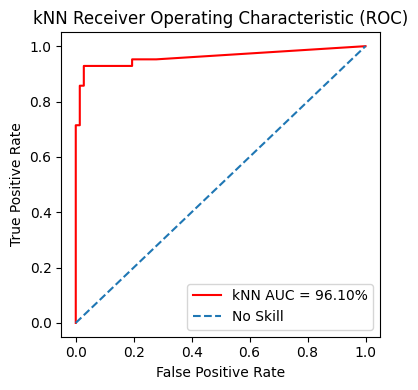

In [49]:
# Plotting the ROC curve
plt.figure(figsize=(4, 4))
plt.plot(false_positive_rate, true_positive_rate, color='red', label='kNN AUC = {:.2f}%'.format(knn_auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('kNN Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### 10. Model Performance with Scaled Features
This section evaluates the model's performance using scaled features.

In [50]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train_fs.astype(np.float64))
X_validation_scale = scaler.transform(X_validation_fs.astype(np.float64))

# Fit the classifier to the scaled data
knn_clf_fs.fit(X_train_scale, y_train_fs)

# Predict and evaluate
y_pred_fs_scaled = knn_clf_fs.predict(X_validation_scale)
accuracy_scaled = knn_clf_fs.score(X_validation_scale, y_validation_fs) * 100
print("Accuracy of kNN with scaled features: {:.2f}%".format(accuracy_scaled))

# Cross-validation with scaled features
scores_cv_scaled = cross_val_score(knn_clf_fs, X_train_scale, y_train_fs, cv=10)
print("Mean CV Score with scaled features: {:.2f}% (Std: {:.2f})"
      .format(scores_cv_scaled.mean() * 100, scores_cv_scaled.std()))

Accuracy of kNN with scaled features: 96.49%
Mean CV Score with scaled features: 96.29% (Std: 0.03)


### 1. Decision Tree Model
This section involves training an initial Decision Tree model to establish a baseline.

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']
X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(X_fs, y_fs, test_size=0.20, random_state=1)

# Training the initial model
classifier_dt_fs = DecisionTreeClassifier()
classifier_dt_fs.fit(X_train_fs, y_train_fs)
print('Initial Decision Tree model trained.')


Initial Decision Tree model trained.


#### 2. Hyperparameter Tuning Using Randomized Search
Optimizing the Decision Tree model by tuning hyperparameters.

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np
from time import time
from sklearn.tree import DecisionTreeClassifier

# Function to report the results of the Randomized Search
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f}% (std: {1:.2f})"
                  .format(results['mean_test_score'][candidate] * 100,
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [53]:
# Parameter distribution for Randomized Search
param_dist = {
    "max_depth": [2, 10],
    "max_features": randint(1, 9),
    "random_state": randint(0, 100),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

In [54]:
# Running Randomized Search
n_iter_search = 50
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=n_iter_search, cv=10)

start = time()
random_search.fit(X_fs, y_fs)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))

# Call the report function with the results
report(random_search.cv_results_)

RandomizedSearchCV took 4.00 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 94.91% (std: 0.03)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 96}

Model with rank: 2
Mean validation score: 94.56% (std: 0.03)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 22}

Model with rank: 3
Mean validation score: 94.21% (std: 0.03)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 7, 'min_samples_split': 3, 'random_state': 28}



#### 3. Pruning the Decision Tree
Pruning the tree to find an optimal balance between complexity and performance.

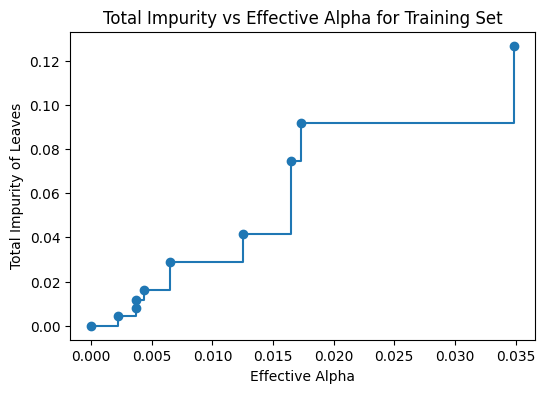

In [55]:
# Pruning the Decision Tree
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_fs, y_train_fs)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Evaluating models for each alpha
clfs = [DecisionTreeClassifier(random_state=0, ccp_alpha=alpha).fit(X_train_fs, y_train_fs) for alpha in ccp_alphas]

# Plotting impurity vs effective alpha
plt.figure(figsize=(6, 4))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

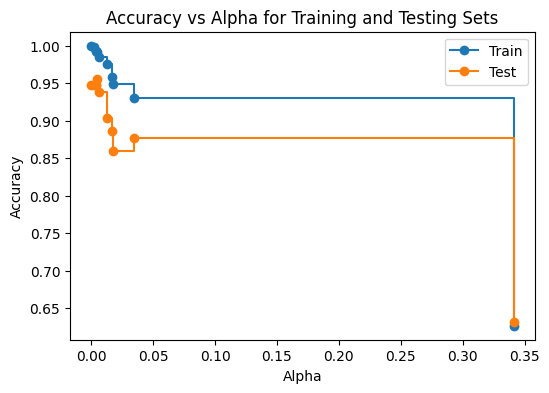

In [56]:
# Accuracy vs Alpha for Training and Testing Sets
train_scores = [clf.score(X_train_fs, y_train_fs) for clf in clfs]
test_scores = [clf.score(X_validation_fs, y_validation_fs) for clf in clfs]

plt.figure(figsize=(6, 4))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Training and Testing Sets")
plt.legend()
plt.show()

#### 4. Refit Model using Best Hyperparameters

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training the Decision Tree classifier with selected hyperparameters
dt_clf_fs = DecisionTreeClassifier(ccp_alpha=0.11, max_features=7, criterion='entropy',
                                   max_depth=10, min_samples_leaf=7, random_state=75,
                                   min_samples_split=8)
dt_clf_fs.fit(X_train_fs, y_train_fs)

# Predicting and evaluating the model
y_pred_fs = dt_clf_fs.predict(X_validation_fs)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_score(y_validation_fs, y_pred_fs) * 100))
print("\nClassification Report:\n", classification_report(y_validation_fs, y_pred_fs))
print("\nConfusion Matrix:\n", confusion_matrix(y_validation_fs, y_pred_fs))


Decision Tree Accuracy: 93.86%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.91      0.93      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Confusion Matrix:
 [[68  4]
 [ 3 39]]


#### 5. Visualizing the Decision Tree
Visualizing the trained Decision Tree to understand its structure.

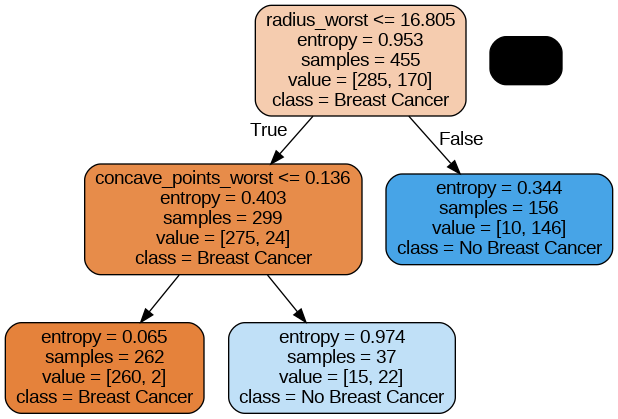

In [58]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Visualizing the Decision Tree
dot_data = export_graphviz(dt_clf_fs, filled=True, rounded=True, class_names=['Breast Cancer', 'No Breast Cancer'],
                           feature_names=X_fs.columns, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


#### 6. Pruning the Decision Tree
Implementing pruning to reduce overfitting and improve model generalization.

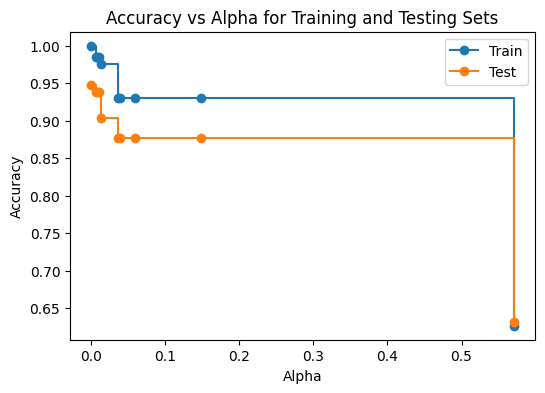

In [59]:
# Pruning the Decision Tree
path = dt_clf_fs.cost_complexity_pruning_path(X_train_fs, y_train_fs)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train Decision Trees for each alpha and evaluate their performance
clfs = [DecisionTreeClassifier(random_state=0, ccp_alpha=alpha).fit(X_train_fs, y_train_fs) for alpha in ccp_alphas]

# Plotting accuracy vs alpha for training and testing sets
train_scores = [clf.score(X_train_fs, y_train_fs) for clf in clfs]
test_scores = [clf.score(X_validation_fs, y_validation_fs) for clf in clfs]

plt.figure(figsize=(6, 4))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Training and Testing Sets")
plt.legend()
plt.show()


#### 7. Comparing Gini Index and Entropy
Comparing performance using different criteria (Gini Index and Entropy).

In [60]:
def calc_accuracy(y_true, y_pred):
    """
    Calculates and prints the accuracy, confusion matrix, and classification report.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    """
    accuracy = accuracy_score(y_true, y_pred) * 100
    conf_matrix = confusion_matrix(y_true, y_pred)
    classif_report = classification_report(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}%")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classif_report)


In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define and train the Decision Tree model using the Gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_gini.fit(X_train_fs, y_train_fs)

# Define and train the Decision Tree model using the Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_entropy.fit(X_train_fs, y_train_fs)

# Now you can predict using these models and calculate the accuracy
print("Performance using Gini Index:")
y_pred_gini = clf_gini.predict(X_validation_fs)
calc_accuracy(y_validation_fs, y_pred_gini)

print("Performance using Entropy:")
y_pred_entropy = clf_entropy.predict(X_validation_fs)
calc_accuracy(y_validation_fs, y_pred_entropy)


Performance using Gini Index:
Accuracy: 94.74%
Confusion Matrix:
[[71  1]
 [ 5 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Performance using Entropy:
Accuracy: 94.74%
Confusion Matrix:
[[72  0]
 [ 6 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### 1. Gaussian Naive Bayes Model Training
Start by training the Gaussian Naive Bayes model and performing initial predictions.

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = dataset_fs.drop('diagnosis', axis=1)
y = dataset_fs['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Training the Gaussian Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Evaluating the model
print("Gaussian Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Gaussian Naive Bayes Confusion Matrix:
 [[70  2]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### 2. Cross-Validation of Gaussian Naive Bayes
Evaluate the model using cross-validation to ensure its robustness.

In [63]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Performing 10-fold cross-validation
scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy') * 100
print("Gaussian Naive Bayes Cross-validation Scores:\n", scores)
print("\nMean CV Score: {:.2f}%".format(np.mean(scores)))


Gaussian Naive Bayes Cross-validation Scores:
 [94.73684211 87.71929825 91.22807018 94.73684211 92.98245614 96.49122807
 92.98245614 98.24561404 94.73684211 96.42857143]

Mean CV Score: 94.03%


#### 3. Visualization of Performance Metrics
Visualize the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) score.

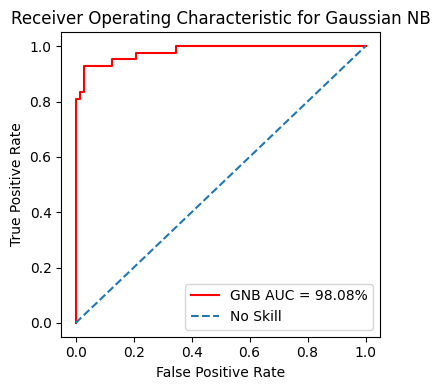

AUC ROC Score for Gaussian NB: 98.08%


In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating probabilities and plotting ROC curve
y_prob = classifier.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate) * 100

plt.figure(figsize=(4, 4))
plt.plot(false_positive_rate, true_positive_rate, color='red', label='GNB AUC = {:.2f}%'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('Receiver Operating Characteristic for Gaussian NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Printing the AUC score
print('AUC ROC Score for Gaussian NB: {:.2f}%'.format(roc_auc))


# 4. Model Experimentation

## a. Experiment with different hyperparameters, and if time permits, different machine learning algorithms.


### ROC Curve Comparison
This section involves plotting the ROC curves for the three models to compare their performance visually.

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define the models for comparison
models = [
    {
        'label': 'Decision Tree',
        'model': DecisionTreeClassifier(ccp_alpha=0.12, max_features=7, criterion='entropy',
                                        max_depth=10, min_samples_leaf=7, random_state=75,
                                        min_samples_split=8)
    },
    {
        'label': 'kNN',
        'model': KNeighborsClassifier(n_neighbors=11, metric='minkowski', weights='distance', p=2)
    },
    {
        'label': 'GaussianNB',
        'model': GaussianNB()
    }
]

# Plotting ROC Curves
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

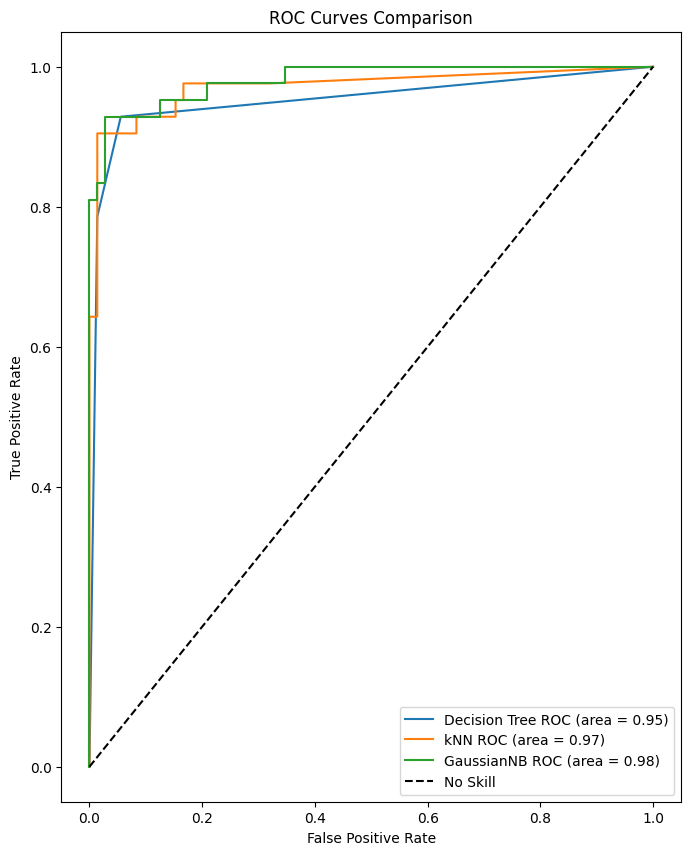

In [66]:
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{m["label"]} ROC (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

### Learning Curve Analysis
This section involves plotting the learning curves for each model to understand how their performance varies with the size of the training set.

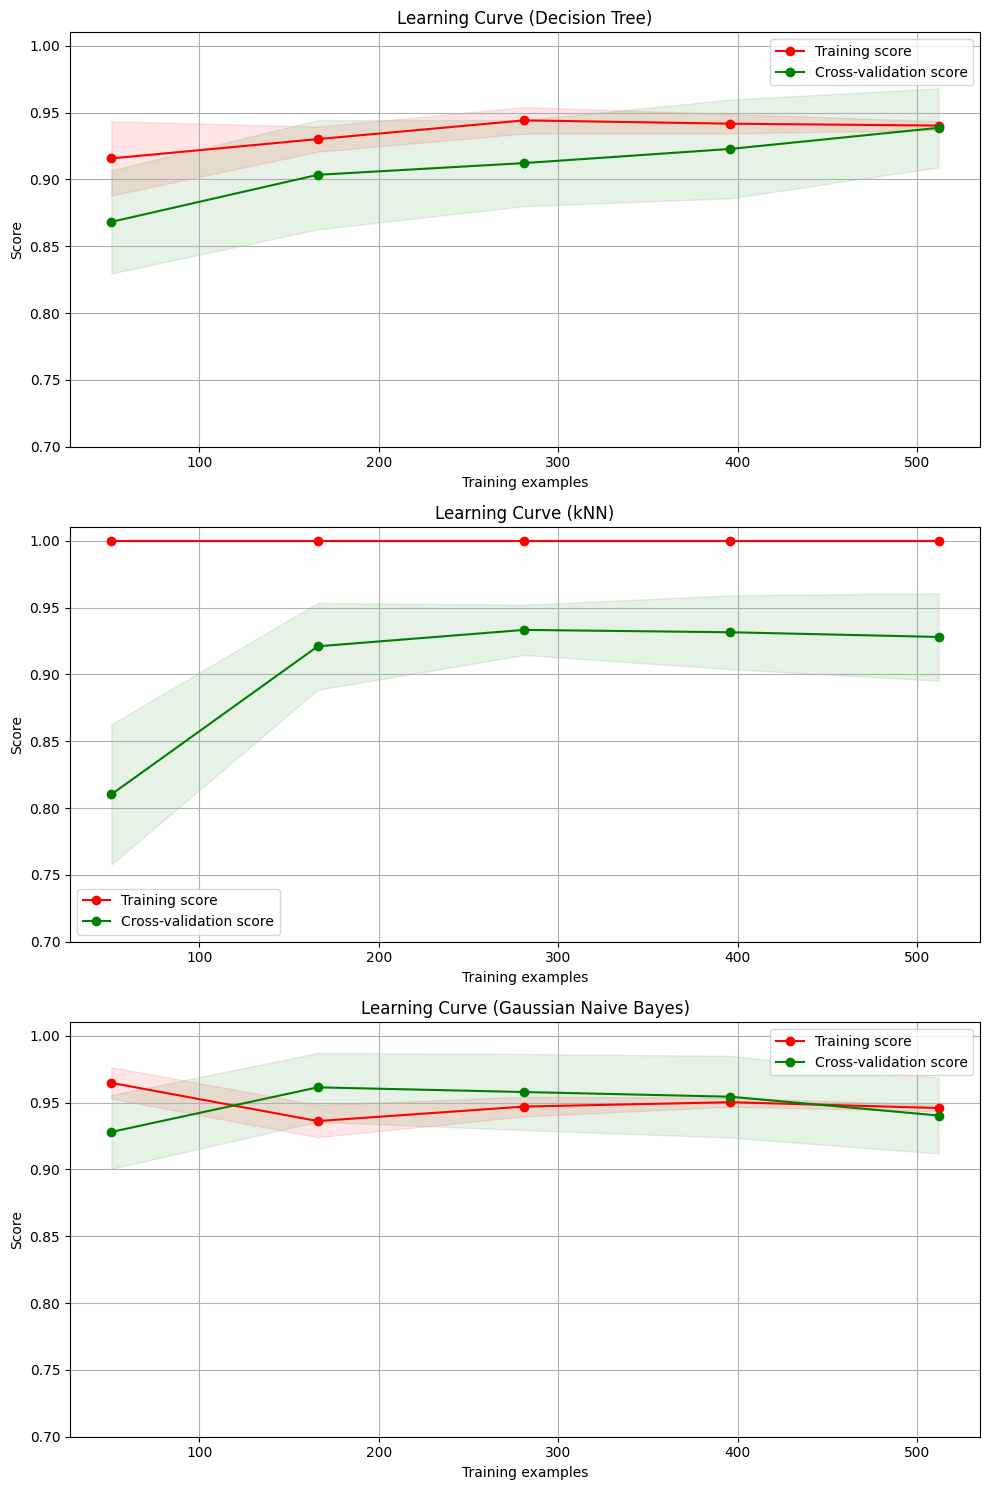

In [67]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Disable parallel processing to avoid the error
n_jobs_param = 1

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Decision Tree Learning Curve
plot_learning_curve(
    DecisionTreeClassifier(ccp_alpha=0.12, max_features=7, criterion='entropy',
                           max_depth=10, min_samples_leaf=7, random_state=75,
                           min_samples_split=8),
    "Learning Curve (Decision Tree)", X, y, axes=axes[0], ylim=(0.7, 1.01), cv=10, n_jobs=n_jobs_param
)

# kNN Learning Curve
plot_learning_curve(
    KNeighborsClassifier(n_neighbors=11, metric='minkowski', weights='distance', p=2),
    "Learning Curve (kNN)", X, y, axes=axes[1], ylim=(0.7, 1.01), cv=10, n_jobs=n_jobs_param
)

# Gaussian Naive Bayes Learning Curve
plot_learning_curve(
    GaussianNB(), "Learning Curve (Gaussian Naive Bayes)", X, y, axes=axes[2], ylim=(0.7, 1.01), cv=10, n_jobs=n_jobs_param
)

plt.tight_layout()
plt.show()


### # PCA Analysis: Principal Components Analysis
PCA identifies the hyperplane that lies closest to the data, and then projects the data onto it.

Original shape of dataset: (569, 30)
Reduced shape of dataset: (569, 2)
Explained variance by the 2 principal components: [0.44272026 0.18971182]


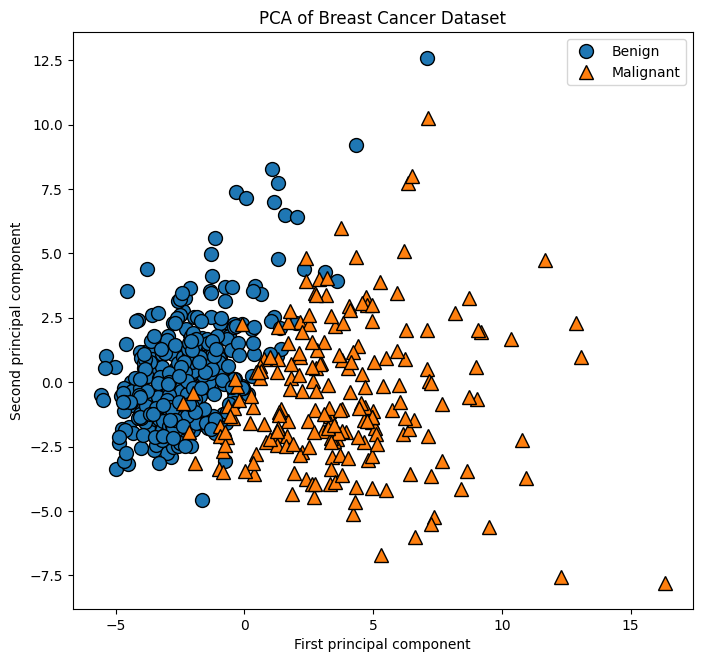

In [68]:
from sklearn.decomposition import PCA

# Apply PCA to the scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_fs_scaled)

# Check the shape of the original and reduced data
print("Original shape of dataset: {}".format(X_fs_scaled.shape))
print("Reduced shape of dataset: {}".format(X_pca.shape))

# Explained variance by the components
print("Explained variance by the 2 principal components: {}".format(pca.explained_variance_ratio_))

# Visualize the PCA-transformed data
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_fs)
plt.legend(["Benign", "Malignant"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of Breast Cancer Dataset")
plt.show()


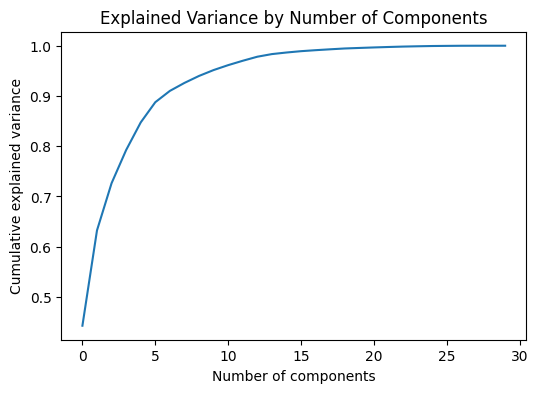

In [69]:
# Plotting the cumulative explained variance to decide the number of components
pca_full = PCA()
pca_full.fit(X_fs_scaled)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
plt.plot(cumulative_explained_variance)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained Variance by Number of Components")
plt.show()

Number of components to explain 95% variance: 10


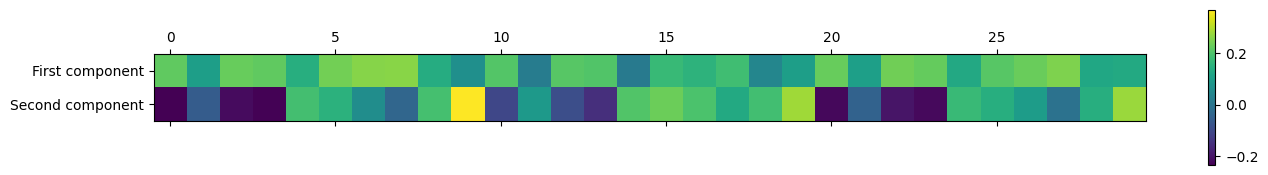

In [70]:
# Find the number of components that explain 95% of the variance
d = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to explain 95% variance: {d}")

# Create a heatmap for the first two principal components and the features
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()

### SVM on PCA data

In [71]:
# Splitting the PCA-reduced data for training and validation
X_train_pca, X_validation_pca, y_train_pca, y_validation_pca = train_test_split(
    X_pca, y_fs, test_size=0.20, random_state=1, stratify=y_fs
)
print('PCA applied to the dataset.')

PCA applied to the dataset.


In [72]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Training SVM on PCA-reduced data
svm_classifier = SVC(C=100, gamma=0.001, kernel='rbf')
svm_classifier.fit(X_train_pca, y_train_pca)

# Prediction and evaluation
y_pred_pca = svm_classifier.predict(X_validation_pca)
svm_score_pca = svm_classifier.score(X_validation_pca, y_validation_pca) * 100

print(f'SVM accuracy on PCA-reduced data: {svm_score_pca:.2f}%')
print('Confusion Matrix:\n', confusion_matrix(y_validation_pca, y_pred_pca))
print('Classification Report:\n', classification_report(y_validation_pca, y_pred_pca))


SVM accuracy on PCA-reduced data: 96.49%
Confusion Matrix:
 [[71  1]
 [ 3 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Hyperparameter Optimization with GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

# Setting parameters for GridSearchCV
tuned_parameters = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
]

# Running GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy', cv=10)
grid_search.fit(X_train_pca, y_train_pca)

print('Best parameters found on training set:')
print(grid_search.best_params_)

# Predicting and evaluating using the best model found
y_true, y_pred_grid = y_validation_pca, grid_search.predict(X_validation_pca)
print('Classification Report for the best model found by GridSearchCV:')
print(classification_report(y_true, y_pred_grid))

Best parameters found on training set:
{'C': 1, 'kernel': 'linear'}
Classification Report for the best model found by GridSearchCV:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Feature Importance for Linear Kernel SVM

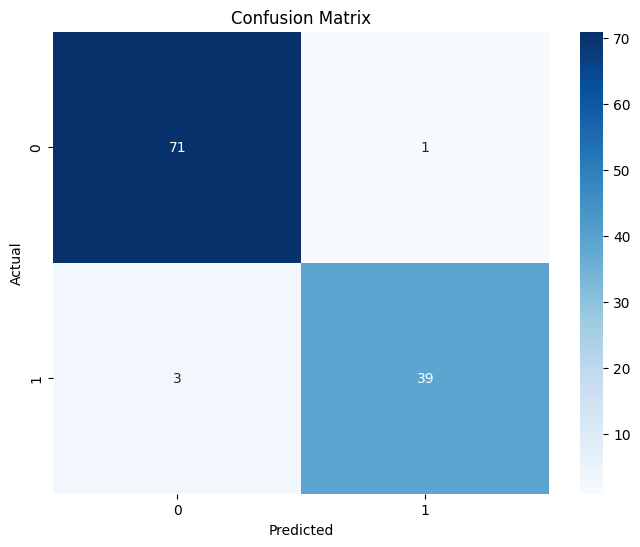

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Compute confusion matrix
conf_mat = confusion_matrix(y_validation_pca, y_pred_pca)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


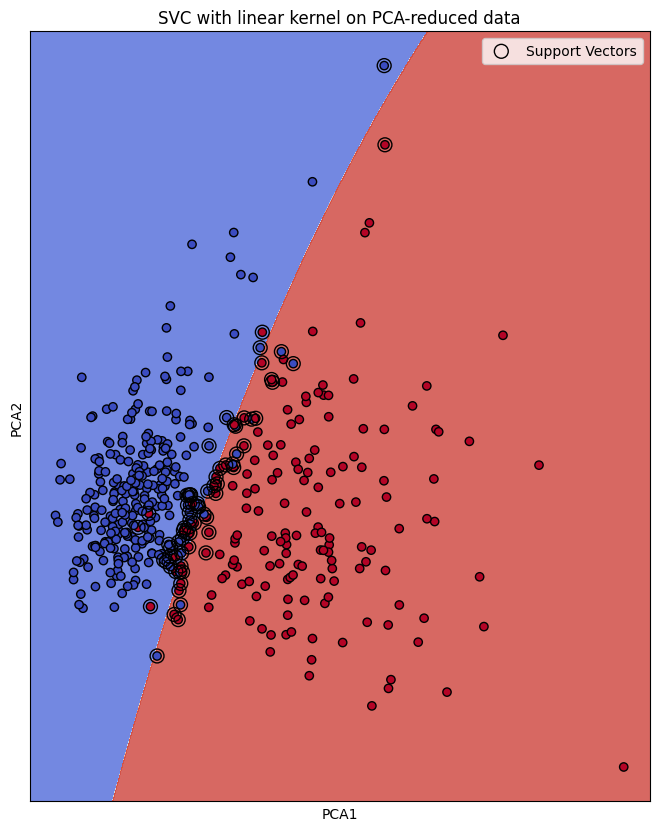

In [75]:

# Create a mesh to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh using the trained model.
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel on PCA-reduced data')

# If your classifier is SVC and it's not linear, you can plot the support vectors
if isinstance(svm_classifier, SVC) and svm_classifier.kernel != 'linear':
    # Plot support vectors
    plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k', marker='o', label='Support Vectors')

plt.legend(loc='upper right')
plt.show()


## b. Document the process and results of your experimentation.

Decision Tree:

The model starts with high accuracy on the training data and lower on the cross-validation.
As more data is used for training, cross-validation accuracy improves, indicating the model benefits from more data.

kNN:

The training score is perfect, likely because kNN can always find the nearest neighbors in a small dataset.
The cross-validation score increases with more data, suggesting that the model's predictions are improving as it learns from more examples.

Gaussian Naive Bayes:

Starts with a slightly lower training score than the other models but improves quickly.
The cross-validation score also increases with more data, although the improvement seems to plateau, indicating that adding more training data beyond a certain point doesn't significantly change the model's performance.

**Conclusion:**
The Decision Tree model shows a convergence of training and validation scores with more data, which is a good sign of model generalization. The kNN model maintains high training accuracy regardless of data size, but its validation performance improves significantly as it sees more data, which is characteristic of kNN's reliance on having enough neighbors to vote for the correct label. Gaussian Naive Bayes shows less variation in scores, suggesting it may be less sensitive to data size under the given feature assumptions.

# 5. Model Evaluation and Interpretation

## a. Evaluate your model's performance on the testing set using appropriate metrics.

Interpreting machine learning models is a complex task, especially for models that are non-linear and non-parametric, such as tree-based models. SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) are two popular tools for explaining the predictions of such models.

### Using SHAP
SHAP values provide a measure of the impact of each feature on the prediction of a particular instance. The SHAP library in Python can be used to compute these values for any model.

In [76]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.1 MB/s eta 0:00:00


In [77]:
import shap

# Train a model (example with Decision Tree)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Create the explainer with the model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a single instance
shap_values = explainer.shap_values(X_test.iloc[0])

In [78]:
# Visualize the SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])

In [79]:
# First, let's save the SHAP force plot to an HTML file
shap_html = shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0], show=False)
shap.save_html("shap_force_plot.html", shap_html)

### Using LIME
LIME generates locally faithful explanations, meaning it perturbs the input data around a prediction and fits a simple model (like a linear model) to these perturbed data to explain the prediction locally.

In [80]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bc4d2707a659ea899032a38280260a07801b5789e585946f70c925e1804bece2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [81]:
import lime
import lime.lime_tabular

# Instantiate the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Breast Cancer', 'Breast Cancer'],
    mode='classification'
)

# Explain a single prediction from the test set
i = 0  # Index of the instance you want to explain
exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba, num_features=10)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [82]:
# Show the explanation
exp.show_in_notebook(show_all=False)

In [83]:
# Now, let's save the LIME explanation to an HTML file
# Note: LIME has a built-in method to save an explanation to an HTML file.
exp.save_to_file('lime_explanation.html')


## b. Interpret the model results and discuss the implications of your findings in the context of healthcare.

SHAP Output Interpretation:
The first image appears to be a SHAP force plot. The base value (0.3736) represents the average model output over the training dataset passed to the explainer. The output value (f(x)) is the actual model output for the instance being explained. Features that push the prediction higher are shown in red, and those that push the prediction lower are in blue.

Features Increasing Prediction of Breast Cancer:

area_worst: A higher value for 'area_worst' has a substantial positive impact on the model's output, indicating an increased likelihood of breast cancer.
texture_worst: A higher value for 'texture_worst' also contributes positively but to a lesser extent.
Features Decreasing Prediction of Breast Cancer:

perimeter_worst: Despite a higher value for 'perimeter_worst', the prediction is pushed towards a lower likelihood of breast cancer. This is an interesting finding that may require further domain-specific investigation to understand why a typically concerning feature has a negative impact on the prediction.

LIME Output Interpretation:
The second image appears to be a LIME explanation. LIME explains predictions locally for an individual instance by approximating the model locally with a linear model.

Features Influencing Prediction towards 'No Breast Cancer':

texture_worst <= 20.97: The feature value being less than or equal to 20.97 has a positive influence on predicting 'No Breast Cancer' with a weight of 0.32.
Features Influencing Prediction towards 'Breast Cancer':

perimeter_worst > 97.66: The feature value being greater than 97.66 has a positive influence on predicting 'Breast Cancer' with a weight of 0.11.
Other features with smaller weights also contribute to the prediction, such as radius_se > 0.50, concave_points_se >= 0.03, etc.

# 6. Code and Documentation


## a. Ensure your code is well-commented and follows best practices for code organization.


## b. Include a well-documented report summarizing your methodology, experimentation process, and findings, along with recommendations for further analysis or improvements.

# 7. Bonus (Optional)
- Investigate the utility of the model in a real-world healthcare scenario and suggest potential areas for deployment or further research.
----------------------------------------------------------

**Evaluation Criteria:**

Your project will be evaluated based on the following criteria:

a. Code quality and organization

b. Understanding and application of machine learning principles

c. Thoroughness of experimentation and analysis

d. Clarity and quality of the report documentation

e. Innovation and creativity in tackling the problem (Bonus)

This assignment is designed to challenge your understanding and application of machine learning principles in a practical, real-world dataset, relevant to healthcare. Your ability to derive meaningful insights and build a predictive model will be crucial in demonstrating your mastery of the concepts taught in this course.